In [1]:
import torch.nn as nn
import torch
import utils
import train
import numpy as np
import pickle5 as pickle

device = torch.device("cpu")
torch.cuda.is_available(), device

(True, device(type='cpu'))

In [2]:
seeds = [0,1,2]
dataset = 'CIFAR10'
depth = 56
num_classes = 10
n_models = 8
confs = [25,23,21,18,16,12,8]
device_num_blocks = 6 * [27] 
for i in range(2):
    device_num_blocks += confs 
device_nums = [6] + 7*[2]

normal_base_paths = [f'saved_models/{dataset}/FedResNet{depth}_{i}/' for i in seeds]
adaptable_base_paths = [f'saved_models/{dataset}/FedAccordionResNet{depth}_{i}/' for i in seeds]
class_base_paths = [f'saved_models/{dataset}/FedClassResNet{depth}_{i}/' for i in seeds]
small_base_paths = [f'saved_models/{dataset}/FedSmallResNet{depth}_{i}/' for i in seeds]
distill_base_paths = [f'saved_models/{dataset}/FedDistillAccordionResNet{depth}_{i}/' for i in seeds]
#distill1_base_paths = [f'saved_models/{dataset}/FedDistillAccordion_1ResNet{depth}_{i}/' for i in seeds]

def get_mean_test_accuracies(base_paths):
    
    accuracies = []

    for base_path in base_paths:
        with open(base_path + 'global_test_accuracies.pkl', 'rb') as f:
            acc = pickle.load(f)
            acc = np.mean(np.array(acc), axis = 1)
            accuracies.append(acc)
    
    return np.mean(accuracies, axis = 0)

normal_mean_test_accuracies = get_mean_test_accuracies(normal_base_paths)
adaptable_mean_test_accuracies = get_mean_test_accuracies(adaptable_base_paths)
small_mean_test_accuracies = get_mean_test_accuracies(small_base_paths)
#distill1_mean_test_accuracies = get_mean_test_accuracies(distill1_base_paths)
distill_mean_test_accuracies = get_mean_test_accuracies(distill_base_paths)


In [3]:
class_test_accuracies = []

for base_path in class_base_paths:
    class_accuracies = []
    for i in range(n_models):
        with open(base_path + f'global_test_accuracies{i}.pkl', 'rb') as f:
            acc = pickle.load(f)
            acc = np.mean(acc, axis = 1)
            class_accuracies.append(acc)
    
    class_accuracies = np.average(class_accuracies, weights = device_nums, axis = 0)
    class_test_accuracies.append(class_accuracies)

class_mean_test_accuracies = np.mean(class_test_accuracies, axis = 0)

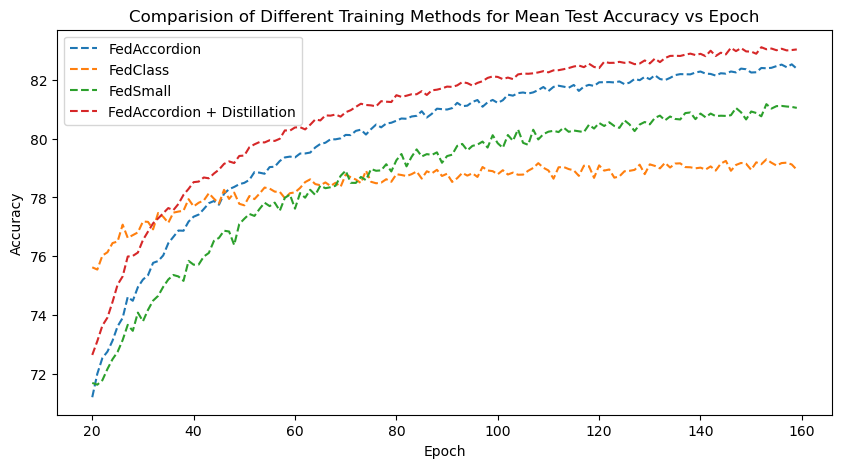

In [7]:
import matplotlib.pyplot as plt

tab = np.arange(len(normal_mean_test_accuracies))[20:]

plt.figure(figsize=(10,5))
#plt.plot(tab, normal_mean_test_accuracies[40:], linestyle = '--', label = 'Fed')
plt.plot(tab, adaptable_mean_test_accuracies[20:], linestyle =  '--',  label = 'FedAccordion')
plt.plot(tab, class_mean_test_accuracies[20:], linestyle = '--',  label = 'FedClass')
plt.plot(tab, small_mean_test_accuracies[20:], linestyle = '--',  label = 'FedSmall')
#plt.plot(np.arange(len(distill1_mean_test_accuracies))[20:], distill1_mean_test_accuracies[20:], linestyle = '--', label = 'FedDistillAccordion0.4')
plt.plot(tab, distill_mean_test_accuracies[20:], linestyle = '--', label =  'FedAccordion + Distillation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Comparision of Different Training Methods for Mean Test Accuracy vs Epoch")

plt.legend()

In [8]:
normal_mean_test_accuracies[-1], adaptable_mean_test_accuracies[-1], class_mean_test_accuracies[-1], small_mean_test_accuracies[-1], distill_mean_test_accuracies[-1]

(50.46733333333333,
 82.37866666666667,
 78.94033333333333,
 81.04666666666668,
 83.03600000000002)

In [9]:
def get_device_final_accuracies(base_paths):

    accuracies = []

    for base_path in base_paths:
        with open(base_path + 'global_test_accuracies.pkl', 'rb') as f:
            acc = pickle.load(f)[-1]
            unique_acc = []
            for a in acc:
                if a not in unique_acc:
                    unique_acc.append(a)
            
            accuracies.append(unique_acc)
    
    return np.mean(accuracies, axis = 0)

normal_final_device_accuracies = get_device_final_accuracies(normal_base_paths)
adaptable_final_device_accuracies = get_device_final_accuracies(adaptable_base_paths)
small_final_device_accuracies = get_device_final_accuracies(small_base_paths) 
distill_final_device_accuracies = get_device_final_accuracies(distill_base_paths) 

In [10]:
normal_final_device_accuracies[0]

92.74666666666667

In [11]:
class_final_device_accuracies = []
for base_path in class_base_paths:
    class_accuracies = []
    for i in range(n_models):
        with open(base_path + f'global_test_accuracies{i}.pkl', 'rb') as f:
            acc = np.mean(pickle.load(f), axis = 1)[-1]
            class_accuracies.append(acc)
    class_final_device_accuracies.append(class_accuracies)

class_final_device_accuracies = np.mean(class_final_device_accuracies, axis = 0)

In [12]:
mfs = [
        0.0013059513398310468,
        0.006782975271330734,
        0.012259999202830421,
        0.017737023134330107,
        0.023214047065829795,
        0.028691070997329482,
        0.03416809492882917,
        0.03964511886032886,
        0.045122142791828544,
        0.05059916672332823,
        0.06695521079273825,
        0.08871325106855893,
        0.11047129134437961,
        0.13222933162020029,
        0.15398737189602096,
        0.17574541217184161,
        0.1975034524476623,
        0.21926149272348297,
        0.24101953299930365,
        0.3061435983765876,
        0.3928756485795141,
        0.4796076987824407,
        0.5663397489853672,
        0.6530717991882938,
        0.7398038493912203,
        0.8265358995941469,
        0.9132679497970735,
        1.0
    ]

model_fractions = []
for i in [27] + confs:
    model_fractions.append(mfs[i])

model_fractions


[1.0,
 0.8265358995941469,
 0.6530717991882938,
 0.4796076987824407,
 0.24101953299930365,
 0.1975034524476623,
 0.11047129134437961,
 0.045122142791828544]

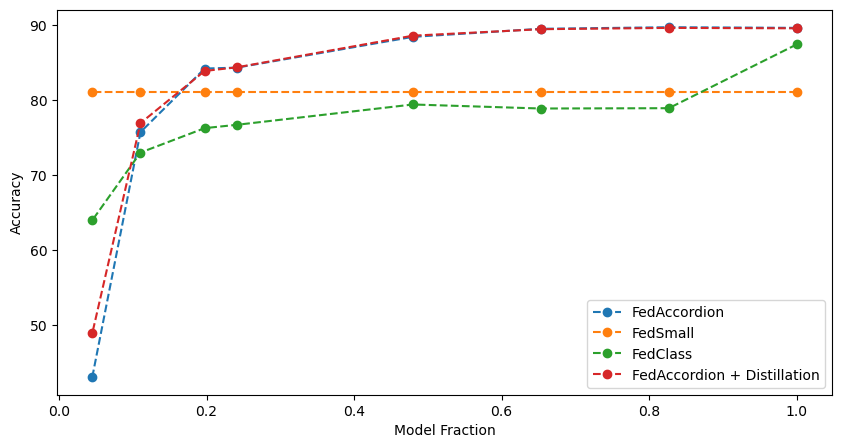

In [13]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(model_fractions, adaptable_final_device_accuracies, label = 'FedAccordion', linestyle = '--', marker = 'o')
#plt.plot(model_fractions, normal_final_device_accuracies, label = 'Fed', linestyle = '--', marker = 'o')
plt.plot(model_fractions, list(small_final_device_accuracies) * n_models, label = 'FedSmall', linestyle = '--', marker = 'o')
plt.plot(model_fractions, class_final_device_accuracies, label = 'FedClass', linestyle = '--', marker = 'o')
plt.plot(model_fractions, distill_final_device_accuracies, label =  'FedAccordion + Distillation', linestyle = '--', marker = 'o')
#plt.plot(model_fractions, distill_final_device_accuracies_01, label = 'FedDistill01', linestyle = '--', marker = 'o')

plt.ylabel('Accuracy')
plt.xlabel('Model Fraction')
plt.title('')

plt.legend()

In [14]:
adaptable_final_device_accuracies, small_final_device_accuracies, class_final_device_accuracies

(array([89.61666667, 89.7       , 89.49      , 88.41666667, 84.31666667,
        84.19666667, 75.73      , 43.08666667]),
 array([81.04666667]),
 array([87.41666667, 78.91666667, 78.87333333, 79.41      , 76.70333333,
        76.26      , 73.00666667, 63.98333333]))

In [15]:
normal_final_device_accuracies

array([92.74666667, 73.88      , 52.62      , 38.24666667, 20.25333333,
       16.61      , 12.97666667, 11.84666667])

In [16]:
distill_final_device_accuracies

array([89.55333333, 89.61      , 89.43666667, 88.57333333, 84.35666667,
       83.87666667, 76.92666667, 48.92      ])